In [1]:
import numpy as np
from sympy import *
import random
import matplotlib.pyplot as plt

# 6월 16일 자정까지 github에 제출 
# 제출 파일명은 "final"

# 1. Random Walks
* https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4

#### (a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

#### (b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [2]:
def walk(state,r):
    if random.random()<r:
        state+=1
    else:
        state-=1
    return state            

In [3]:
def mc(time_step,prob,iteration):
    memory=[]
    for k in range(iteration):
        path=[] 
        state=0 #initial state
        for time in range(time_step):
            new_state=walk(state,prob)
            path.append(new_state)
            state=new_state
            #plt.plot(path,'o-')
        memory.append(state)
    return memory

#### (a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

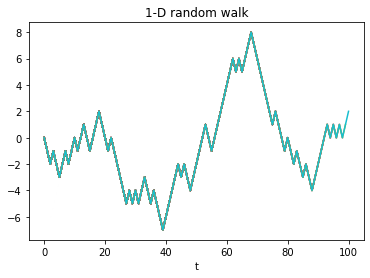

In [4]:
path=[0] 
state=0 #initial state
for time in range(100):
    new_state=walk(state,0.5)
    path.append(new_state)
    state=new_state
    plt.title("1-D random walk")
    plt.plot(path,'-')
    plt.xlabel('t')
      

#### (b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

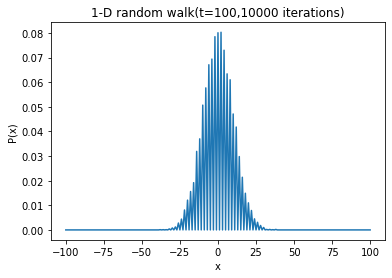

In [5]:
a=mc(100,0.5,10000)
x=list(range(-100,101,1))
y=[]
for i in x:
    num=a.count(i)
    y.append(num/10000)
plt.title("1-D random walk(t=100,10000 iterations)")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,y)
plt.show()



# 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.
$$ \frac{dx}{dt}= rx-x^2. $$

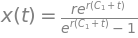

In [6]:
init_printing(use_latex=True)
t= symbols('t')
r=symbols('r')
x = Function('x')
deq=Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(deq)

#### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식) 
1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

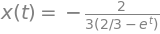

In [7]:
#1
t= symbols('t')
r=symbols('r')
x = Function('x')
deq1=Eq(x(t).diff(t),-1*x(t)-x(t)**2)
dsolve(deq1,ics={x(0):2})


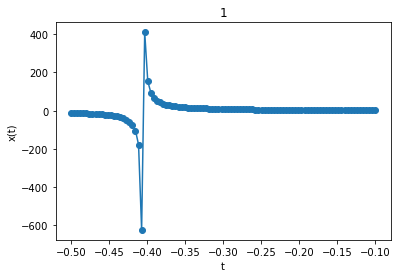

In [8]:
t1=np.linspace(-0.5,-0.1,100)
f1=[-2/(3*(2/3 - exp(i))) for i in t1] 
plt.title('1')
plt.plot(t1,f1,'o-')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

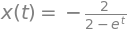

In [9]:
#2
t= symbols('t')
r=symbols('r')
x = Function('x')
deq2=Eq(x(t).diff(t),-1*x(t)-x(t)**2)
dsolve(deq2,ics={x(0):-2})

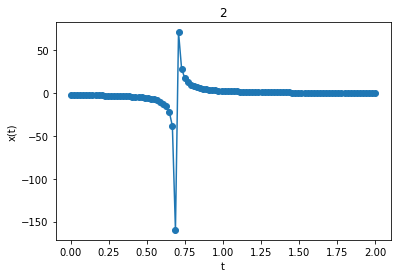

In [10]:
t2=np.linspace(0,2,100)
f2=[-2/(2 - exp(i)) for i in t2]
plt.title('2')
plt.plot(t2,f2,'o-')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

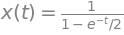

In [11]:
#3
t= symbols('t')
r=symbols('r')
x = Function('x')
deq3=Eq(x(t).diff(t),x(t)-x(t)**2)
dsolve(deq3, ics={x(0):2})

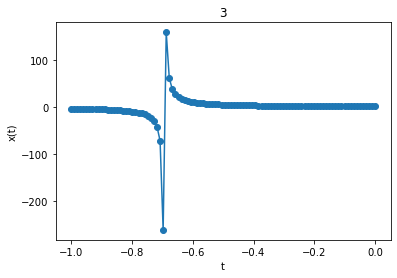

In [12]:
t3=np.linspace(-1,0,100)
f3=[1/(1 - exp(-i)/2) for i in t3]
plt.title('3')
plt.plot(t3,f3,'o-')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

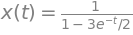

In [13]:
#4
t= symbols('t')
r=symbols('r')
x = Function('x')
deq4=Eq(x(t).diff(t),x(t)-x(t)**2)
dsolve(deq4,ics={x(0):-2})

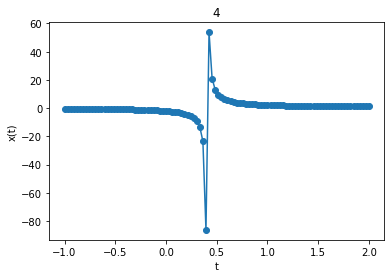

In [14]:
t4=np.linspace(-1,2,100)
f4=[1/(1 - 3*exp(-i)/2) for i in t4]
plt.title('4')
plt.plot(t4,f4,'o-')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

## 1,2,3,4 모두 특정 구간에서 궤적을 알기 어렵다.(chaotic하다)

#### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라. 
$$ 0= rx -x^2 = x( r-x) $$
1. r=-1
2. r=1

In [15]:
#1
x=symbols('x')
eq1=x*(-1-x)
print(solve(eq1))

[-1, 0]


In [16]:
#2
x=symbols('x')
eq2=x*(1-x)
print(solve(eq2))

[0, 1]
